In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
anime = pd.read_csv("/kaggle/input/anime-recommendations-database/anime.csv")
rating = pd.read_csv("/kaggle/input/anime-recommendations-database/rating.csv")

In [3]:
print(f"Shape of The Anime Dataset : {anime.shape}")
anime.head()

Shape of The Anime Dataset : (12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
print(f"Shape of The Rating Dataset : {rating.shape}")
rating.head()

Shape of The Rating Dataset : (7813737, 3)


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [7]:
anime.describe(include=object)

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


In [8]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
anime.dropna(axis = 0, inplace = True)
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [10]:
rating.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,7813737.0,36727.956745,20997.946119,1.0,18974.0,36791.0,54757.0,73516.0
anime_id,7813737.0,8909.072104,8883.949636,1.0,1240.0,6213.0,14093.0,34519.0
rating,7813737.0,6.144030,3.727800,-1.0,6.0,7.0,9.0,10.0


In [11]:
rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [12]:
print(f"before:{rating.sum()}, after:{rating.duplicated(keep='first').sum()}")

before:user_id     286982594550
anime_id     69613146337
rating          48007831
dtype: int64, after:1


In [13]:
anime.duplicated().sum()

0

In [14]:
rating.duplicated().sum()  #1
rating.drop_duplicates(keep='first',inplace=True)
rating.duplicated().sum()

0

- merge the anime and rating datasets

In [15]:
fulldata = pd.merge(anime, rating, on="anime_id", suffixes= [None, "_user"])
print(fulldata.shape)
fulldata.head()

(7813610, 9)


,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


## Visualization

- Top Anime Community

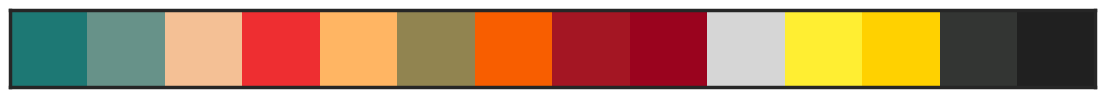

In [16]:
sns.set_style("white")
sns.set_context("poster",font_scale = .3)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

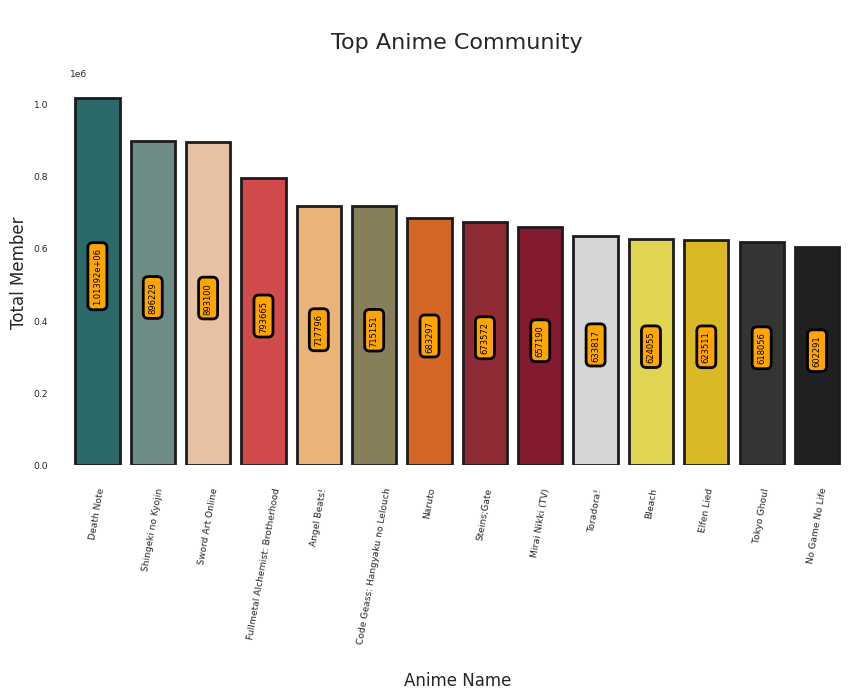

In [17]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"], ascending=False)

plt.subplots(figsize=(10,5))
p = sns.barplot(x=top_anime_temp1["name"][:14],y=top_anime_temp1["members"],palette=palette,saturation=0.7,edgecolor="#1c1c1c",linewidth=2)
p.axes.set_title("\nTop Anime Community\n", fontsize=16)
plt.ylabel("Total Member", fontsize = 12)
plt.xlabel("\nAnime Name", fontsize = 12)
plt.xticks(rotation = 80)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 4,size = 6,color = "black",rotation = 90,
    bbox={"boxstyle":"round", "pad":0.6, "facecolor":"orange", "edgecolor":"black", "alpha":1})

sns.despine(left=True, bottom=True)
plt.show()

- Anime Categories Distribution

In [18]:
top_anime_temp1["type"].value_counts()

type
TV         3402
OVA        3090
Movie      2111
Special    1581
ONA         526
Music       451
Name: count, dtype: int64

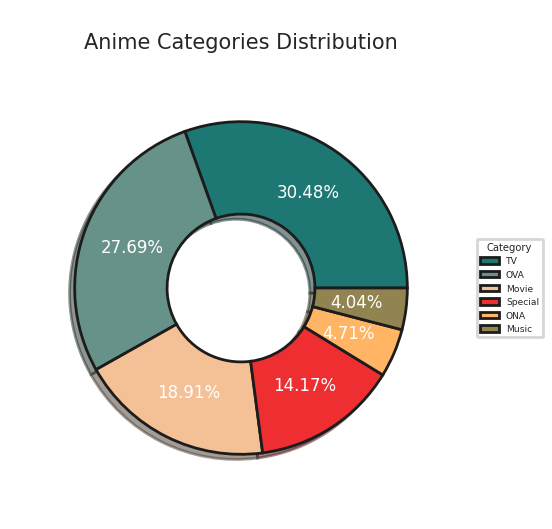

In [19]:
plt.subplots(figsize=(6, 6))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 12, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 2),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=15)
plt.show()

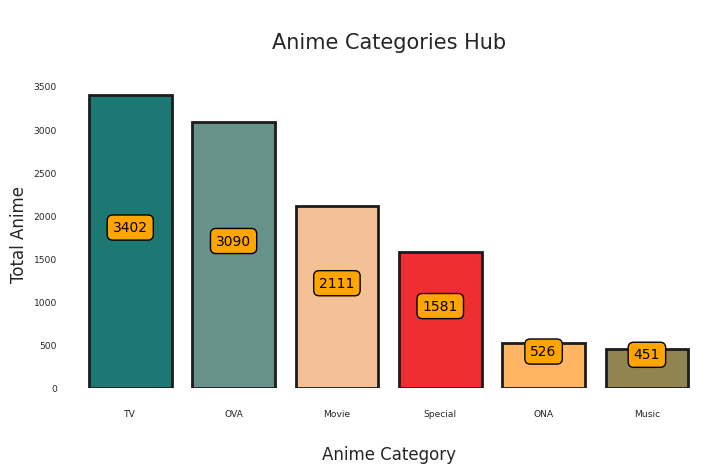

In [20]:
plt.subplots(figsize = (8,4))
p = sns.countplot(x = top_anime_temp1["type"], order = top_anime_temp1["type"].value_counts().index, palette = palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nAnime Categories Hub\n" ,fontsize = 15)
plt.ylabel("Total Anime" ,fontsize = 12)
plt.xlabel("\nAnime Category" ,fontsize = 12)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 10,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth" : 1, "alpha": 1})

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

- TV : 3402 animes, which is 30.48 % of total animes
- OVA : 3090 animes, which is 27.69 % of total animes   ( greater than ONA which includes 526 animes ( 4.71 % ) )
- Movie : 2111 animes, which is 18.91 % of total animes

### Overall Anime Rating

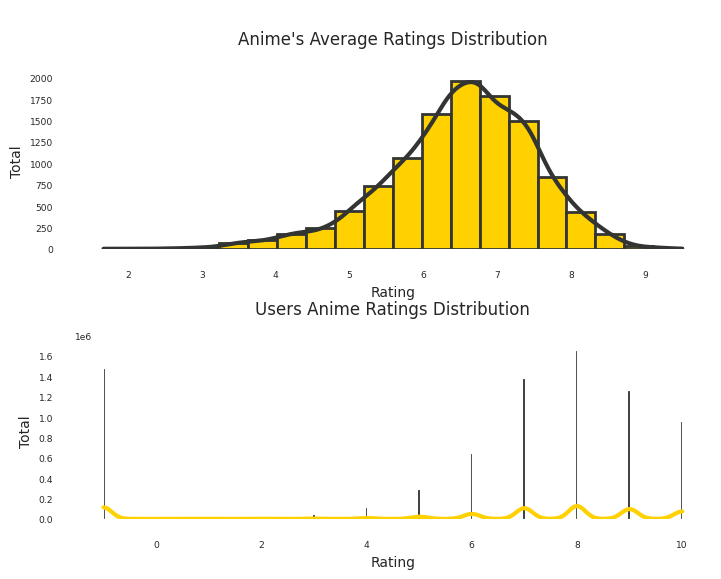

In [21]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(8,6),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 12)
axs[0].set_xlabel("Rating\n", fontsize = 10)
axs[0].set_ylabel("Total", fontsize = 10)

sns.histplot(fulldata["rating_user"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 12)
axs[1].set_xlabel("Rating", fontsize = 10)
axs[1].set_ylabel("Total", fontsize = 10)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

- Most of the Anime ratings are spread between 5.5 - 8.0
- Most of the users ratings are spread between 6.0 - 10.0
- The mode of the users ratings distribution is around 7.0 - 8.0
- Both the distribution are left skewed
- Users rating(-1) is an outlier in ratings of users which can be discarded

- Top Animes Based On Ratings

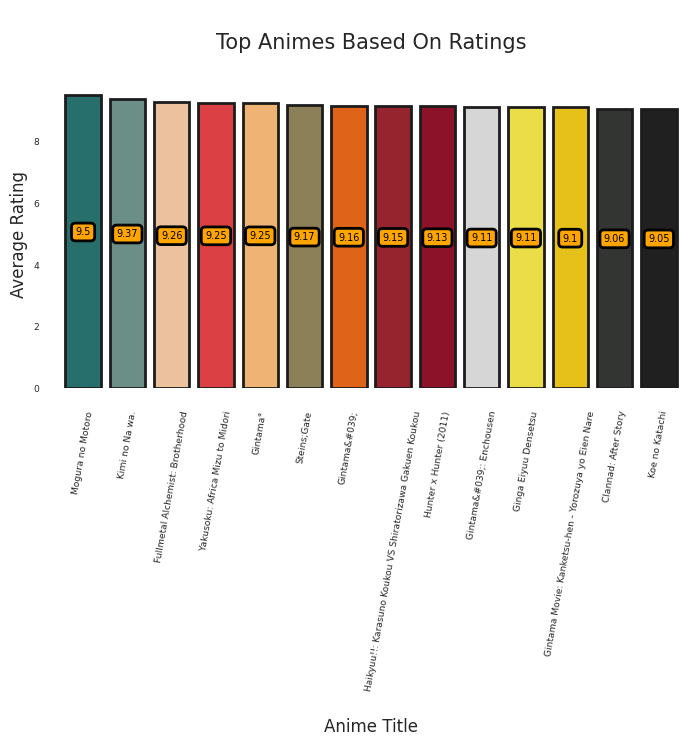

In [29]:
plt.subplots(figsize=(8,4))
p = sns.barplot(x=top_anime_temp2["name"][:14],y=top_anime_temp2["rating"],palette=palette, saturation=0.8, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 15)
plt.ylabel("Average Rating",fontsize = 12)
plt.xlabel("\nAnime Title",fontsize = 12)
# plt.yscale("log")
plt.xticks(rotation = 80)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 7,size = 7,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

- No 1. Mogura no Motoro  |  No 2. Kimi no Na wa  |  No 3. Fullmetal Alchemist: Brotherhood 

### Ratings Distribution with different category
- TV、OVA、Movies、Special、ONA、Music


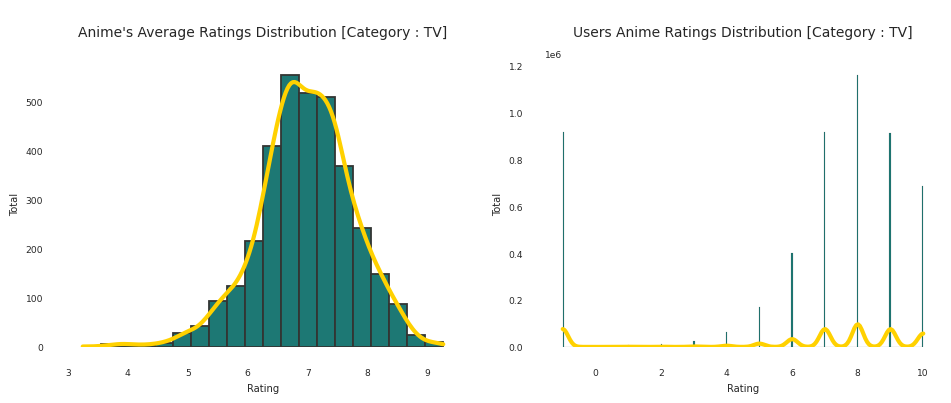

In [44]:
# TV category
_, axs = plt.subplots(1,2,figsize=(10,4),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="TV"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : TV]\n",fontsize=10)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="TV"]["rating_user"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : TV]\n",fontsize=10)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()


**Insights [Category : TV] :**

- Most of the Anime ratings are spread between 6.0 - 8.0
- Most of the users ratings are spread between 6.0 - 10.0
- The mode of the users ratings distribution is around 7.0 - 9.0
- Both the distribution are left skewed
- Users rating(-1) is an outlier in ratings of users which can be discarded

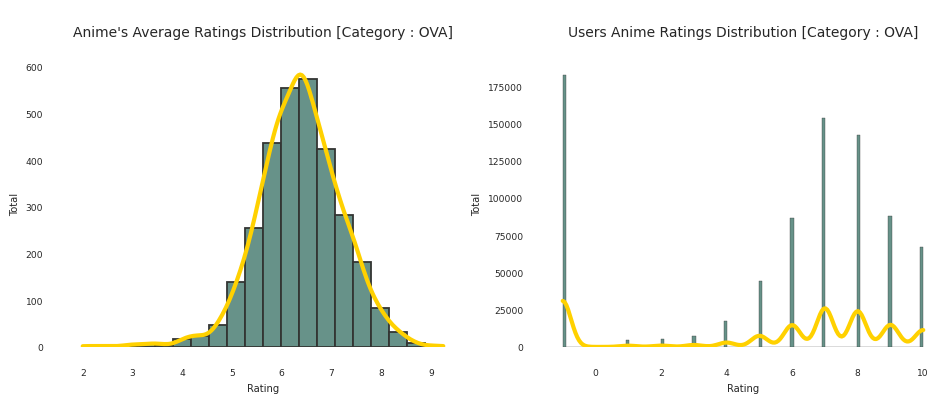

In [43]:
# OVA category
_, axs = plt.subplots(1,2,figsize=(10,4),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="OVA"]["rating"],color=palette[1],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : OVA]\n",fontsize=10)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="OVA"]["rating_user"],color=palette[1],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : OVA]\n",fontsize=10)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights [Category : OVA] :**

- Most of the Anime ratings are spread between 5.5 - 7.5
- Most of the users ratings are spread between 5.5 - 10.0
- The mode of the users ratings distribution is around 7.0 - 8.0
- Both the distribution are left skewed
- Users rating(-1) is an outlier in ratings of users which can be discarded

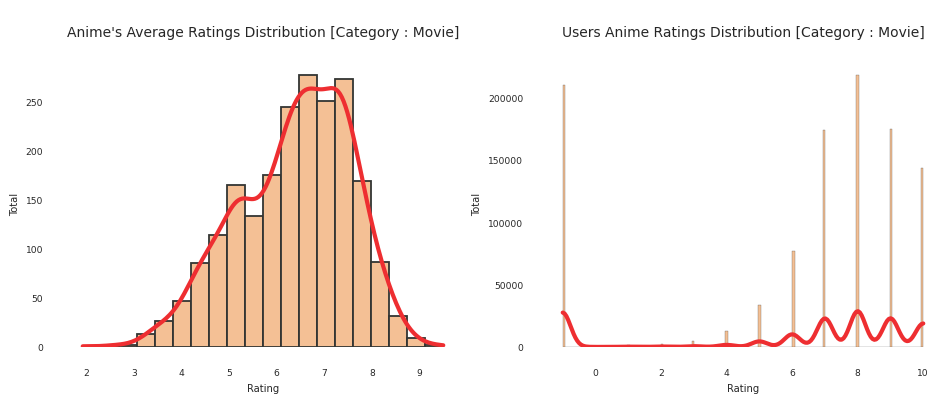

In [42]:
# MOVIE category
_, axs = plt.subplots(1,2,figsize=(10,4),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Movie"]["rating"],color=palette[2],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Movie]\n",fontsize=10)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Movie"]["rating_user"],color=palette[2],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Movie]\n",fontsize=10)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights [Category : Movie] :**

- Most of the Anime ratings are spread between 4.5 - 8.5
- Most of the users ratings are spread between 5.0 - 10.0
- The mode of the users ratings distribution is around 7.0 - 9.0
- Both the distribution are left skewed
- Users rating(-1) is an outlier in ratings of users which can be discarded

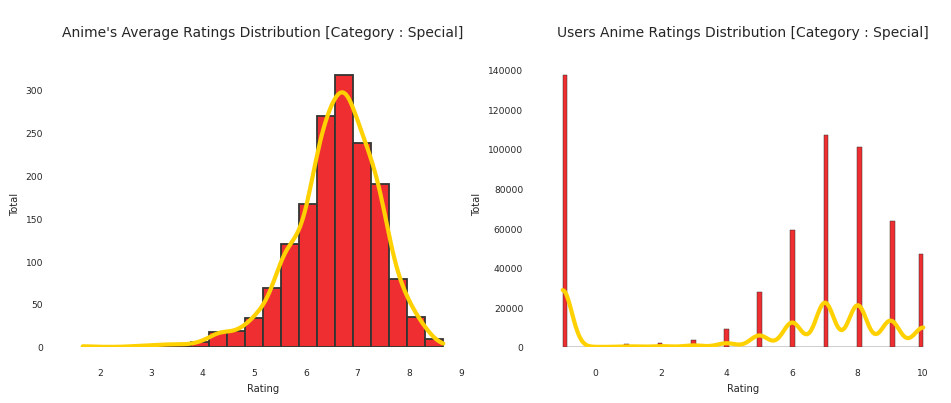

In [41]:
# SPECIAL category
_, axs = plt.subplots(1,2,figsize=(10,4),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Special"]["rating"],color=palette[3],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Special]\n",fontsize=10)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Special"]["rating_user"],color=palette[3],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Special]\n",fontsize=10)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights [Category : Special] :**

* Most of the Anime ratings are spread between 5.5 - 8.0
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

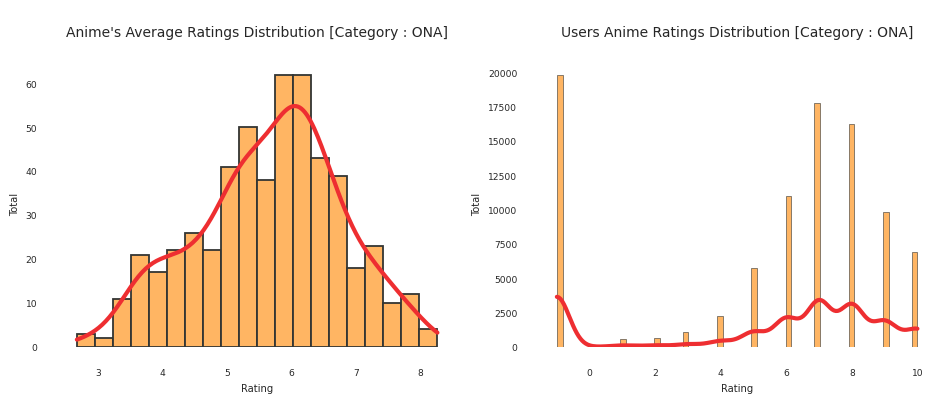

In [45]:
# ONA category
_, axs = plt.subplots(1,2,figsize=(10,4),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="ONA"]["rating"],color=palette[4],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : ONA]\n",fontsize=10)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="ONA"]["rating_user"],color=palette[4],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : ONA]\n",fontsize=10)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights [Category : ONA] :**
* Most of the Anime ratings are spread between 4.0 - 7.0
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

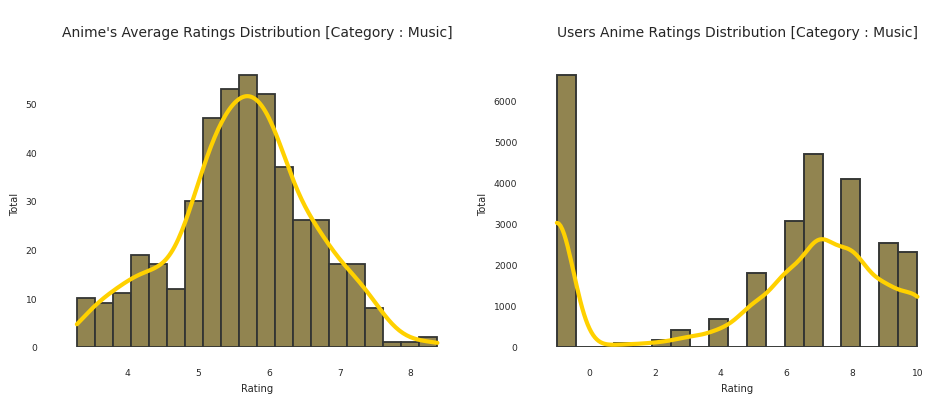

In [46]:
# MUSIC category
_, axs = plt.subplots(1,2,figsize=(10,4),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Music"]["rating"],color=palette[5],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Music]\n",fontsize=10)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Music"]["rating_user"],color=palette[5],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Music]\n",fontsize=10)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights [Category : Music] :**

* Most of the Anime ratings are spread between 4.0 - 7.5
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 6.5 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

## Anime Genres

In [67]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

print(f'Total unique genres are {len(top_anime_temp3["genre"].unique())}')
print(f'Occurances of unique genres :')
top_anime_temp3["genre"].value_counts().to_frame().T

Total unique genres are 43
Occurances of unique genres :


genre,Comedy,Action,Adventure,Fantasy,Sci-Fi,Drama,Shounen,Romance,Kids,School,...,Game,Samurai,Vampire,Thriller,Cars,Shounen Ai,Shoujo Ai,Josei,Yuri,Yaoi
count,4271,2686,2197,2107,1981,1857,1636,1420,1306,1135,...,161,142,97,84,65,61,54,52,41,37


let's explore how genre's wordcloud looks like



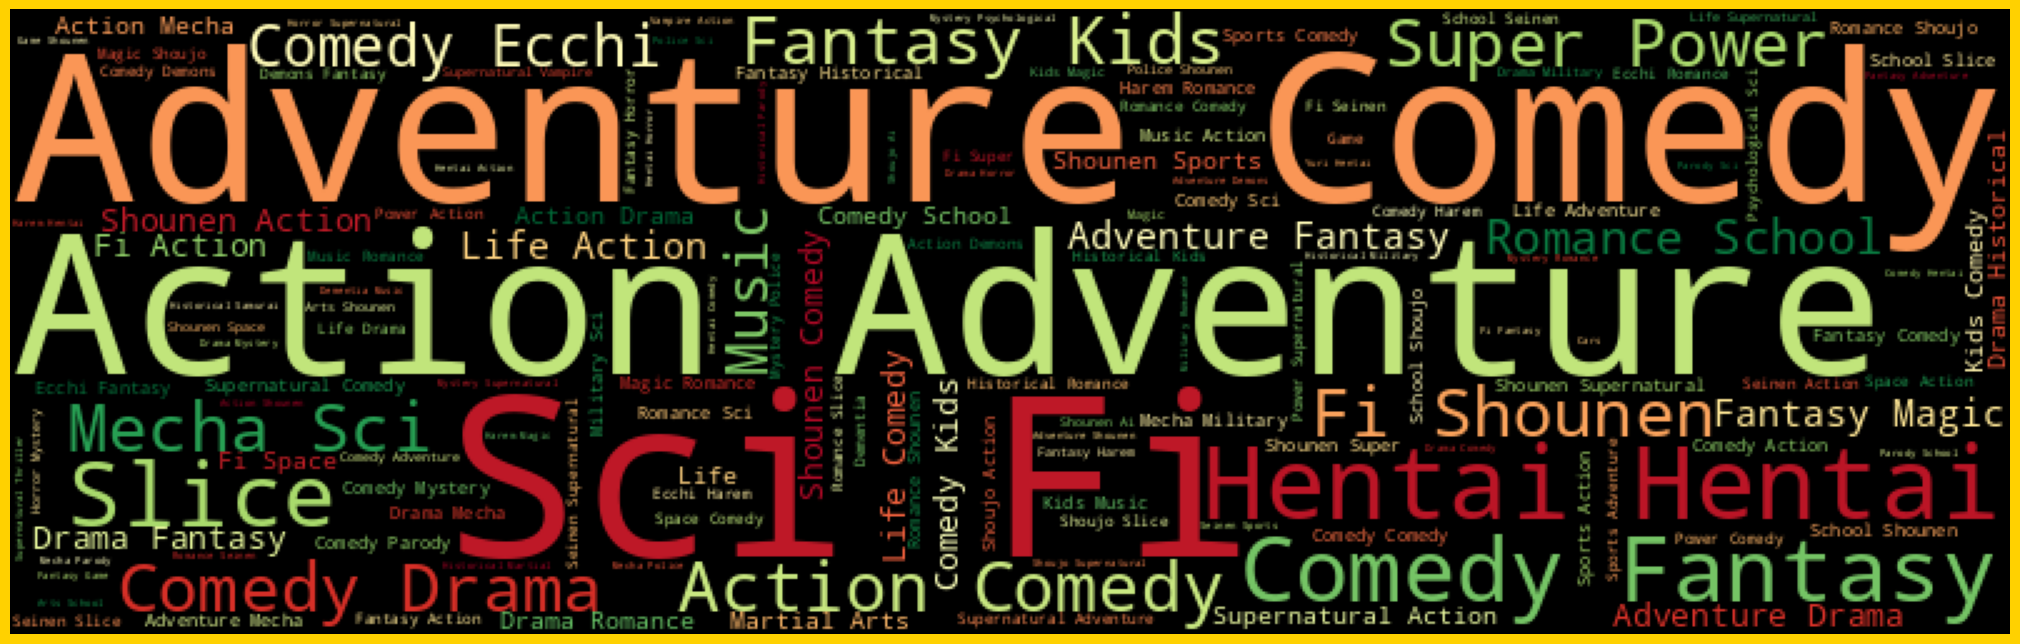

In [78]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 250, background_color ="black",colormap ="RdYlGn",
                      max_font_size=90, stopwords =None,repeat= True).generate(top_anime["genre"].str.cat(sep=", | , | ,"))

print("let's explore how genre's wordcloud looks like\n")
plt.figure(figsize = (20, 8),facecolor = "#ffd100") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0) 
plt.show()

## Final Data Preprocessing

In [83]:
data = fulldata.copy()
data["rating_user"].replace(to_replace = -1 , value = np.nan ,inplace=True)  #replace "rating_user"=-1 to nan
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame().T

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,0,0,0,0,0,0,0,0,0


There are a lot of users who have rated only once, even if they have rated 5 animes, it can't be considered as a valuable record for recommendation. So we will consider minimum 50 ratings by the user as a threshold value.

In [85]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]
data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0


Create a pivot table consists of rows as title and columns as user id, this will help us to create sparse matrix which can be very helpful in finding the cosine similarity.

In [90]:
data_pivot = data.pivot_table(index="name",columns="user_id",values="rating_user").fillna(0)
data_pivot.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Collaborative Recommender

In [92]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

# random anime title and finding recommendation
query_no = np.random.choice(data_pivot.shape[0]) 
print(f"We will find recommendation for {query_no} no anime which is {data_pivot.index[query_no]}.")

distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

We will find recommendation for 5799 no anime which is Momotarou Densetsu.


In [98]:
no = []
name = []
distance = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {data_pivot.index[query_no]} viewers :\n")
    else:
        #  print(f"{i}: {data_pivot.index[indices.flatten()[i]]} , with distance of {distances.flatten()[i]}")        
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)

dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation

Recommendations for Momotarou Densetsu viewers :



,Anime Name,Rating
No,,
1,Karaoke Senshi Mike-tarou,7.05
2,Kaitei Sanman Mile,6.32
3,Utsunomiko: Heaven Chapter,6.18
4,Juuni Senshi Bakuretsu Eto Ranger,6.97
5,Ginga Tetsudou no Yoru: Fantasy Railroad in th...,6.68


## Content Based Recommender
- TF-IDF

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = fulldata.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

- assign 1 for recommended anime and 0 for not recommended anime
- sigmoid kernel

In [100]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()


# Recommendation Function
def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores 
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]
     
    # Top 10 most similar movies
    rec_dic = {"No" : range(1,11), 
               "Anime Name" : anime["name"].iloc[anime_indices].values,
               "Rating" : anime["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe

In [101]:
give_recommendation("Naruto")

Recommendations for Naruto viewers :



,Anime Name,Rating
No,,
1,To LOVE-Ru Darkness OVA,7.82
2,Hanbun no Tsuki ga Noboru Sora,7.69
3,Mai-HiME,7.59
4,Doraemon Movie 28: Nobita to Midori no Kyojin Den,7.54
5,Rurouni Kenshin Special,7.51
6,Pikmin Short Movies,7.27
7,Deadman Wonderland OVA,7.12
8,Anata mo Robot ni Nareru feat. Kamome Jidou Ga...,5.12
9,Shinpi no Hou,5.37


In [102]:
give_recommendation("Death Note")

Recommendations for Death Note viewers :



,Anime Name,Rating
No,,
1,Hachimitsu to Clover Specials,7.85
2,Trapp Ikka Monogatari,7.75
3,Major S1,8.42
4,Hakkenden: Touhou Hakken Ibun,7.57
5,Ushi Atama,4.87
6,ef: A Tale of Melodies.,8.18
7,Saki Achiga-hen: Episode of Side-A Specials,7.63
8,One Piece: Oounabara ni Hirake! Dekkai Dekkai ...,7.43
9,Kizumonogatari II: Nekketsu-hen,8.73


- refer : https://www.kaggle.com/code/hasibalmuzdadid/anime-ratings-analysis-recommender-system